 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns 

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_data = Path('../Starter_Code/Resources/whale_returns.csv')
whale_df = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

C:\Users\JamesDavidson\AppData\Local\Temp\ipykernel_7808\1638241660.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_df = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)


In [3]:
# Count nulls within the Whale Portfolio
whale_null_values = whale_df.isnull().sum()
whale_null_values.head()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace=True)

In [5]:
# Verify that nulls have been dropped within dataframe
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Set the algorithmic Path and read the algorithmic return data 
algo_data = Path('../Starter_Code/Resources/algo_returns.csv')
algo_df = pd.read_csv(algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True)


C:\Users\JamesDavidson\AppData\Local\Temp\ipykernel_7808\1236812136.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_df = pd.read_csv(algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True)


In [7]:
# Count nulls within the Algorithmic Portfolio
algo_null_values = algo_df.isnull().sum()
algo_null_values.head()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_df.dropna(inplace=True)


In [9]:
# Verify that nulls have been dropped within dataframe
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [10]:
algo_df.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P 500 Closing Prices
sp500_data = Path('../Starter_Code/Resources/sp500_history.csv')
sp500_df = pd.read_csv(sp500_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

sp500_df.head()

C:\Users\JamesDavidson\AppData\Local\Temp\ipykernel_7808\1102719830.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp500_df = pd.read_csv(sp500_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
C:\Users\JamesDavidson\AppData\Local\Temp\ipykernel_7808\1102719830.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_df = pd.read_csv(sp500_data, index_col="Date", infer_datetime_format=True, parse_dates=True)


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [12]:
# Count nulls within the SP500 Portfolio
sp500_null_values = sp500_df.isnull().sum()
sp500_null_values.head()

Close    0
dtype: int64

In [13]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [14]:
# Fix Data Types by removing $ sign 

sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df['Close']

Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: object

In [15]:
# Convert data type of Close from object into integer to perfrom financial analysis
sp500_df['Close'] = sp500_df['Close'].astype('float')
sp500_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [16]:
# Calculate Daily Returns of the SP500 datafame since the rest of the files are quoted in returns
sp500_daily_returns = sp500_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [17]:
# Count nulls within the S&P500 Portfolio
sp500_null_values = sp500_df.isnull().sum()
sp500_null_values.head()

Close    0
dtype: int64

In [18]:
# Drop nulls
sp500_df.dropna(inplace=True)

In [19]:
# Rename `Close` Column to SP500 to make viewing easy when comparing portfolios.
sp500_daily_returns.rename(columns={"Close": "SP500"}, inplace=True)
sp500_daily_returns.head()

,SP500
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


## Combine Whale, Algorithmic, and S&P 500 Returns

In [20]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_daily_returns_df = pd.concat([whale_df, algo_df, sp500_daily_returns], axis="columns", join="inner")

#Sort datetime index in ascending order
combined_daily_returns_df.sort_index(inplace=True)

combined_daily_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

In [21]:
combined_daily_returns_df.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


In [22]:
combined_daily_returns_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
Algo 1                         float64
Algo 2                         float64
SP500                          float64
dtype: object

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

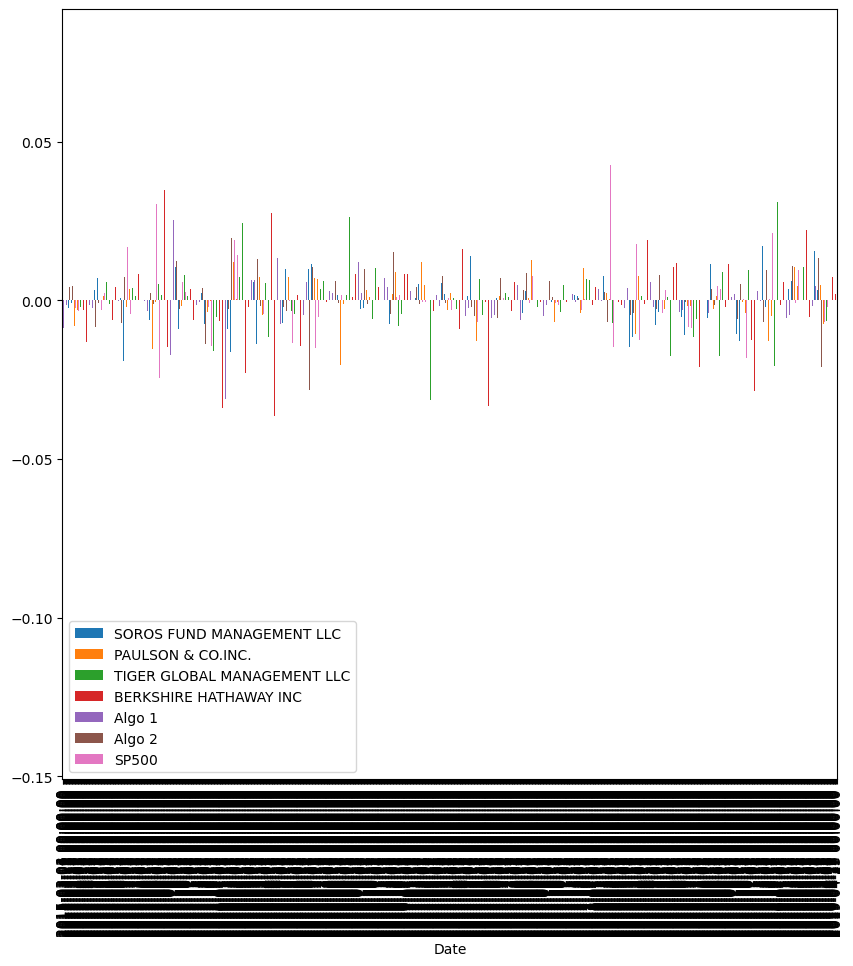

In [23]:
# Since the data was already received in daily returns(minus sp500 - which was fixed). Plot daily returns

combined_daily_returns_df.plot(kind='bar', figsize=(10,10))

#### Calculate and Plot cumulative returns.

In [24]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_daily_returns_df).cumprod() - 1
cumulative_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,0.003208
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,0.017632
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,0.013634
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,0.031123


<Axes: xlabel='Date'>

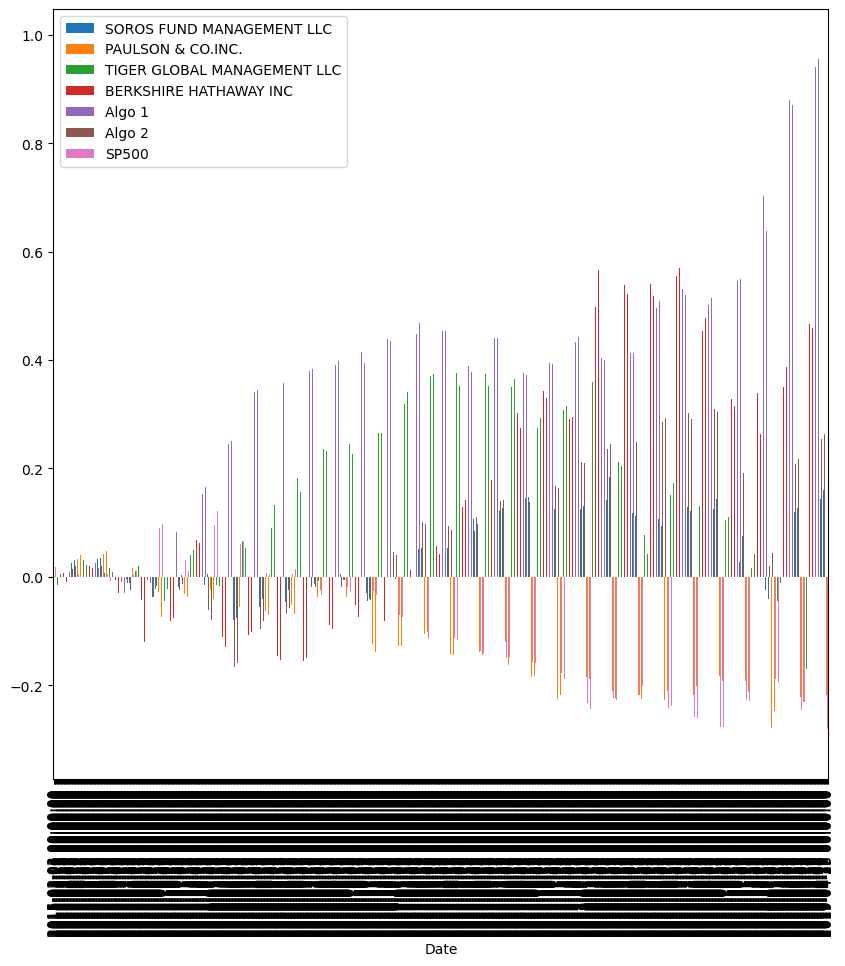

In [25]:
# Plot cumulative returns
cumulative_returns.plot(kind="bar", figsize=(10,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

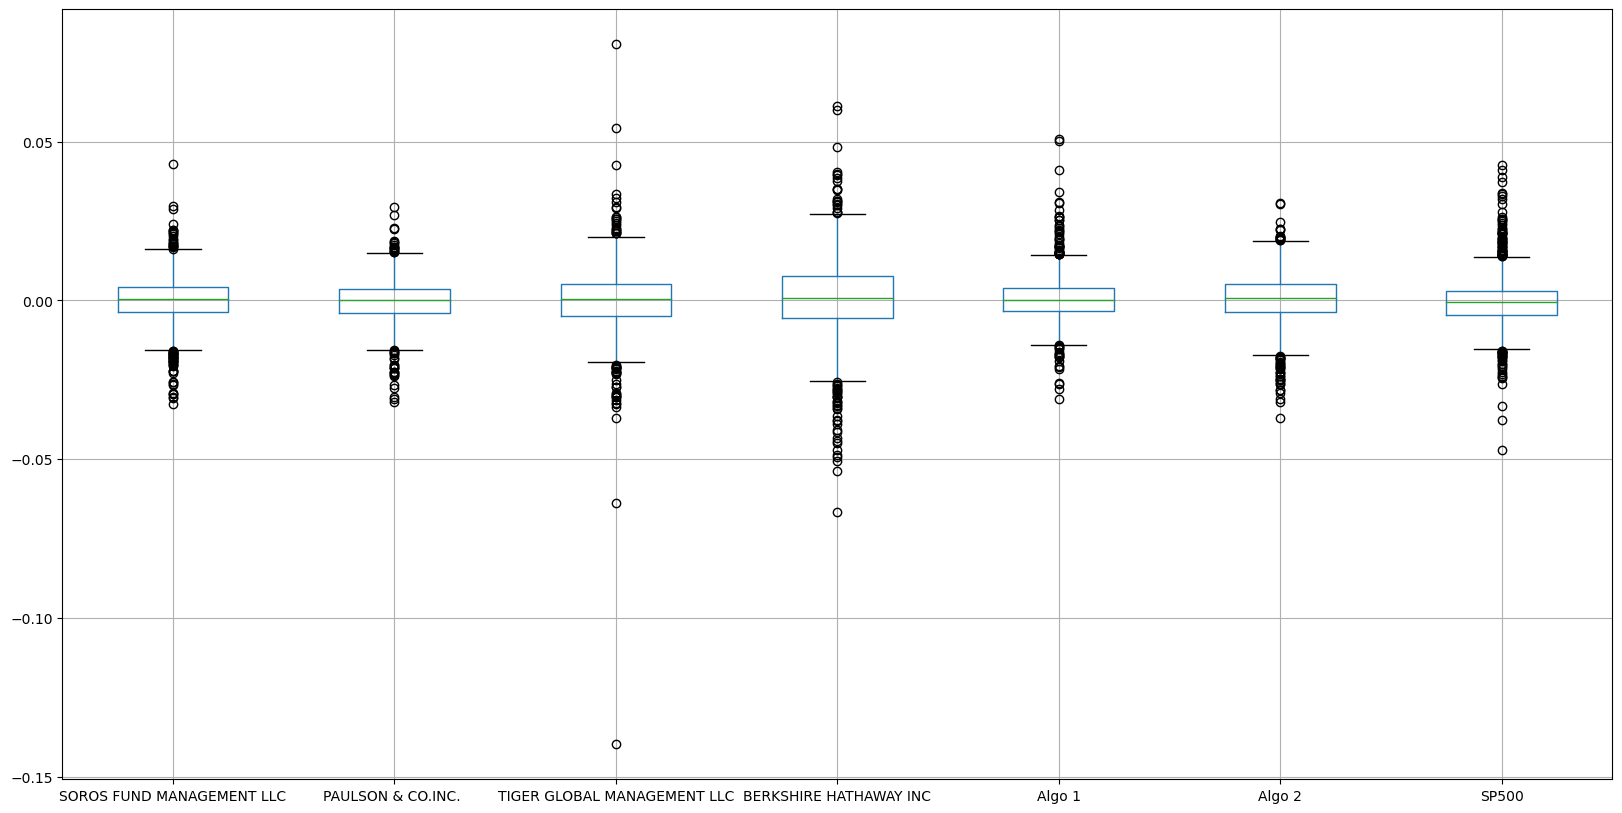

In [26]:
# Box plot to visually show risk
combined_daily_returns_df.boxplot(figsize=(20,10))


### Calculate Standard Deviations

In [27]:
# Calculate the daily standard deviations of all portfolios
all_portfolio_std = combined_daily_returns_df.std()
all_portfolio_std.head(10)

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500                          0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [28]:
# Calculate  the daily standard deviation of S&P 500
daily_sp500_std = sp500_daily_returns.std()
daily_sp500_std.head()


SP500    0.008135
dtype: float64

In [29]:
# Determine which portfolios are riskier than the S&P 500.
# To help woth identifying stock with the most risk we will sort in descending order.
all_portfolio_std = all_portfolio_std.sort_values(ascending=False)
all_portfolio_std.head(7)

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
SP500                          0.008587
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Calculate the Annualized Standard Deviation

In [30]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = all_portfolio_std*np.sqrt(252) 
annualized_std.head(7) 

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
SP500                          0.136313
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: title={'center': 'Rolling 21-Day Standard Deviation'}, xlabel='Date'>

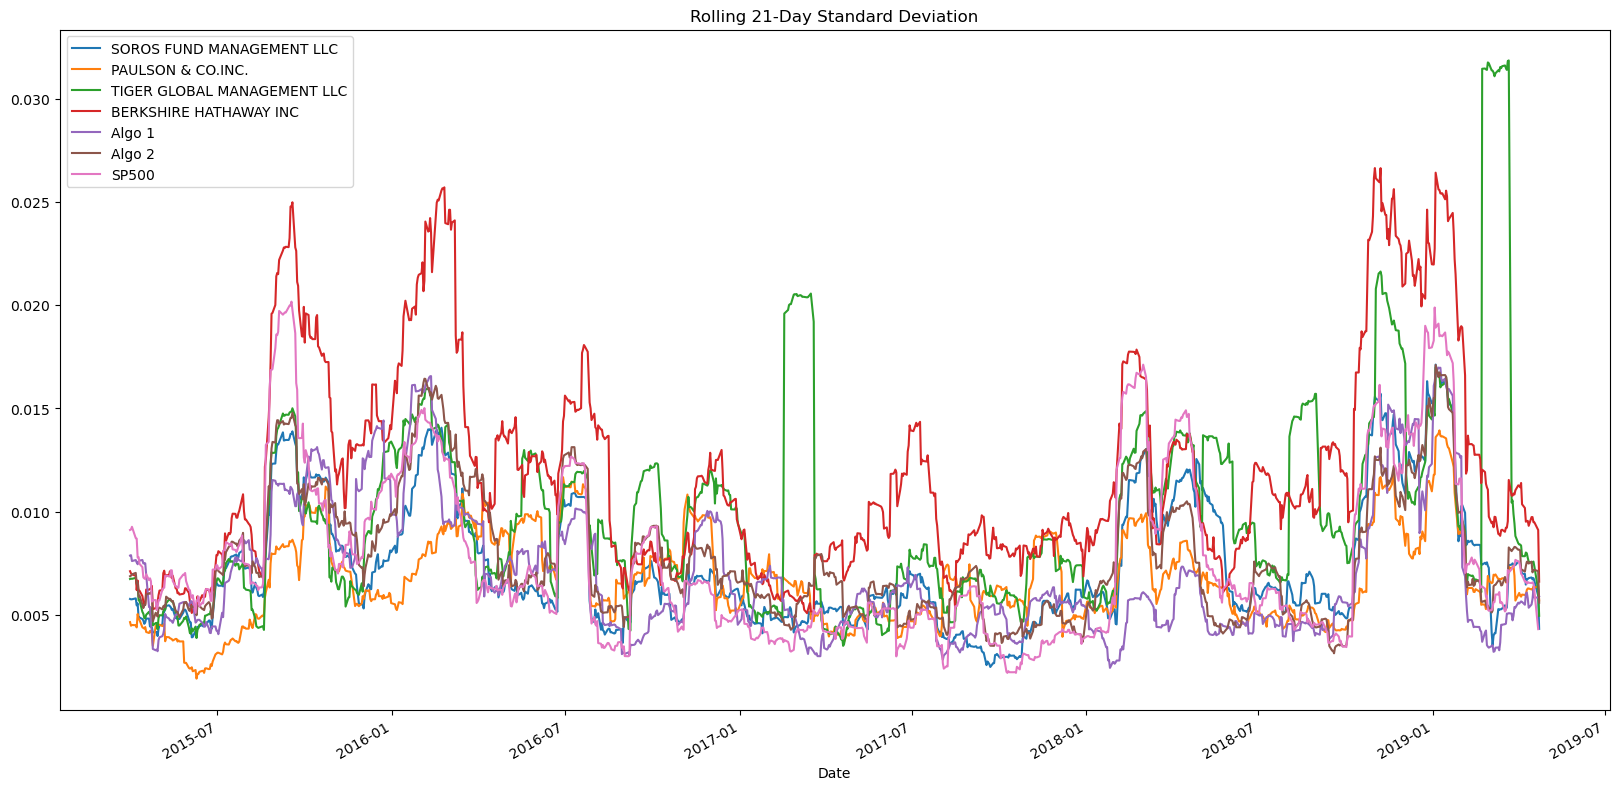

In [31]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combined_daily_returns_df.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std.plot(title='Rolling 21-Day Standard Deviation', figsize=(20,10))

### Calculate and plot the correlation

<Axes: >

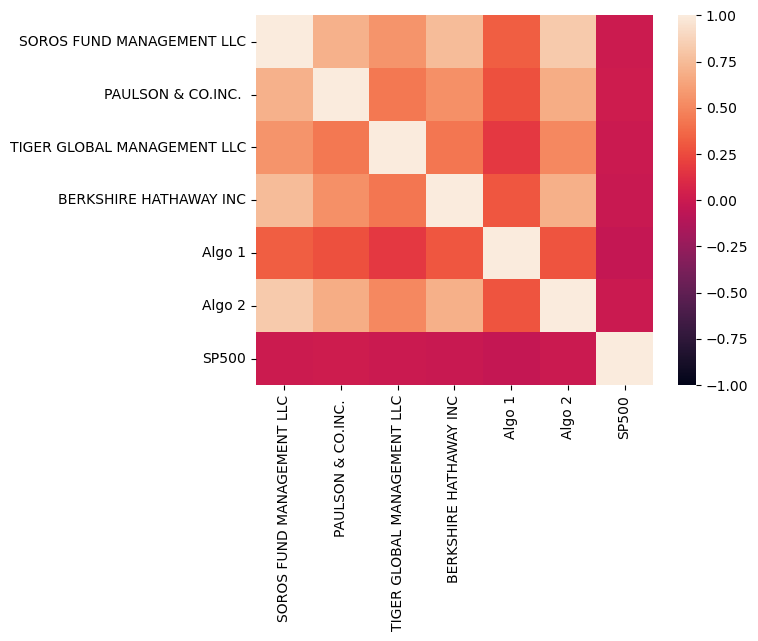

In [32]:
# Calculate the correlation
price_correlation = combined_daily_returns_df.corr()

# Display correlation matrix
sns.heatmap(price_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [33]:
# Calculate covariance of only the Berkshire Hathaway INC
berk_covariance = combined_daily_returns_df['BERKSHIRE HATHAWAY INC'].cov(combined_daily_returns_df['SP500'])
berk_covariance



-1.5371091324717372e-06

In [34]:
# Calculate variance of S&P 500
sp500_variance = combined_daily_returns_df['SP500'].var()
sp500_variance

7.373467552840441e-05

In [35]:
# Computing beta
berk_beta = berk_covariance / sp500_variance
berk_beta

-0.020846489408902394

In [36]:
# Calculate 21-day rolling covariance of berk
rolling_berk_covariance = combined_daily_returns_df['BERKSHIRE HATHAWAY INC'].rolling(window=21).cov(combined_daily_returns_df['SP500'])

# Calculate 21-day rolling variance of S&P 500
rolling_variance = combined_daily_returns_df['SP500'].rolling(window=21).var()

# Calculate 21-day rolling beta of berk 
rolling_berk_beta = rolling_berk_covariance / rolling_variance
rolling_berk_beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.176830
2019-04-17    0.131482
2019-04-18    0.121636
2019-04-22   -0.380622
2019-04-23         NaN
Length: 1043, dtype: float64

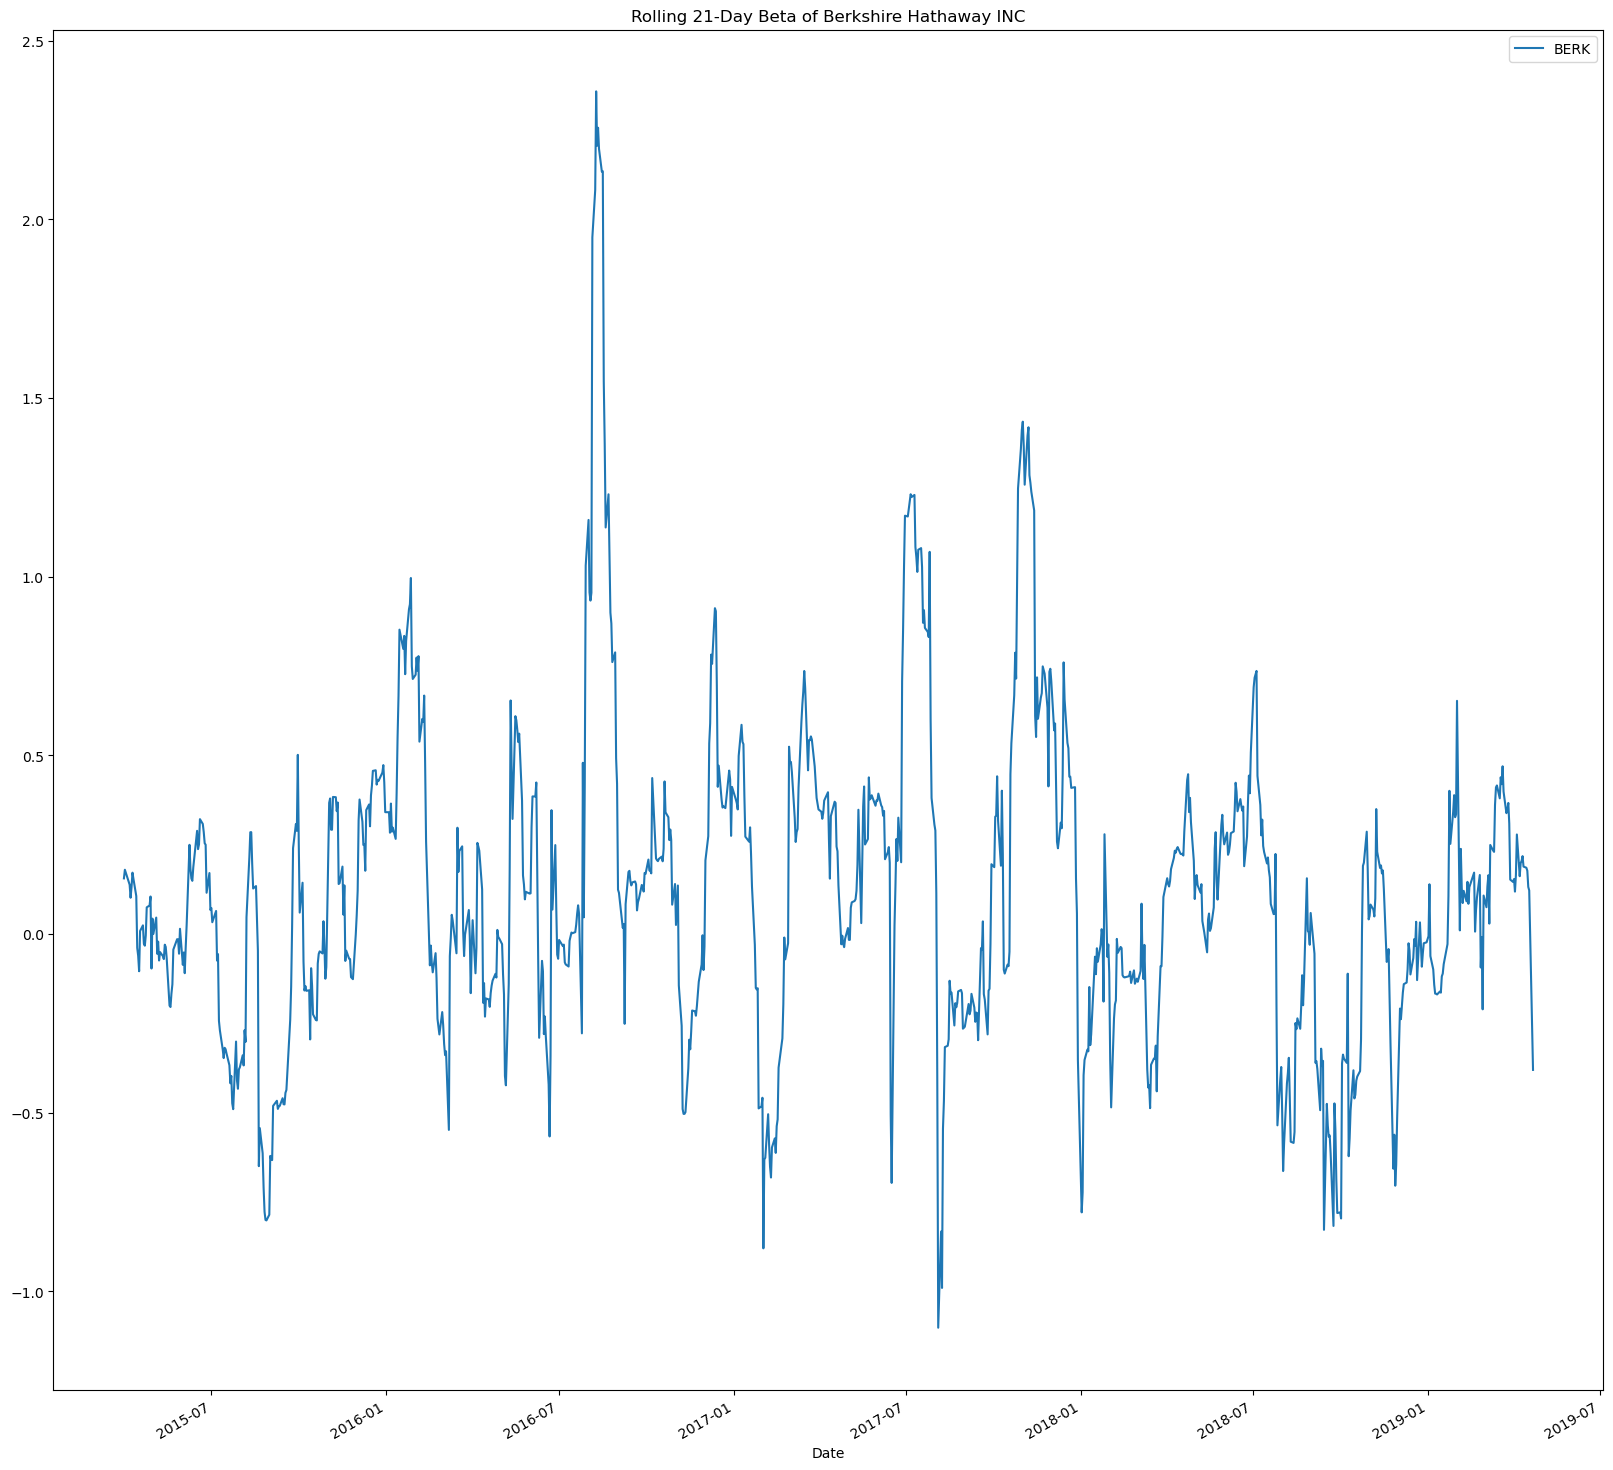

In [37]:
# Plot beta trend
ax = rolling_berk_beta.plot(figsize=(20, 20), title='Rolling 21-Day Beta of Berkshire Hathaway INC')

ax.legend(["BERK"])


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [38]:
# Use `ewm` to calculate the rolling window
#ewm = combined_daily_returns_df.ewm(halflife='21 days' combined_daily_returns_df=pd.DatetimeIdex(combined_daily_returns_df)).mean()
#ewm.head()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [39]:
# Calculated Sharpe Ratio's for the selected portfolios using Daily returns 
sharpe_ratios = ((combined_daily_returns_df.mean()-combined_daily_returns_df['SP500'].mean() * 252) / (combined_daily_returns_df.std() * np.sqrt(252)))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.565417
PAULSON & CO.INC.              0.632135
TIGER GLOBAL MANAGEMENT LLC    0.408279
BERKSHIRE HATHAWAY INC         0.347164
Algo 1                         0.589840
Algo 2                         0.535778
SP500                          0.516524
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

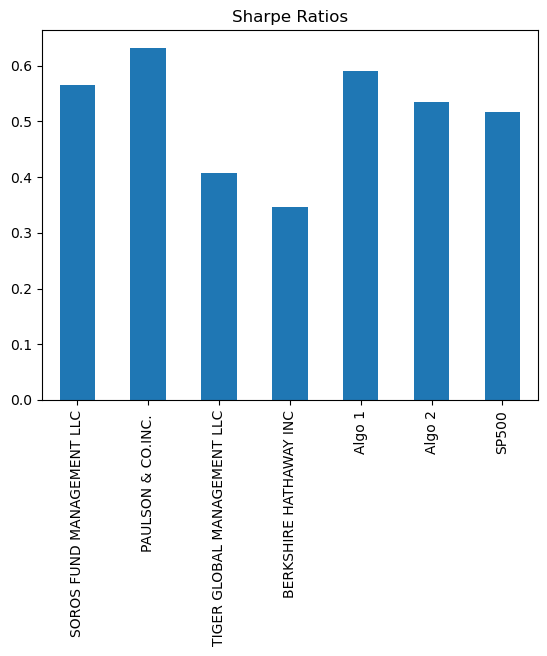

In [40]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [41]:
# The algorithmic portfolios both seem to be performing fairly well. The two algo portfolio's have attracctive correlation and both algo portfolios are top 4 in Sharpe Ratio for decent risk to return. Paulson & co.Inc seem to be the best.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [42]:
# Reading data from 1st stock - Tesla Motors
tsla_data = Path('../Starter_Code/Resources/tsla_historical.csv')
tsla_df = pd.read_csv(tsla_data, index_col="close_date", infer_datetime_format=True, parse_dates=True)

tsla_df.head()

C:\Users\JamesDavidson\AppData\Local\Temp\ipykernel_7808\3721701885.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  tsla_df = pd.read_csv(tsla_data, index_col="close_date", infer_datetime_format=True, parse_dates=True)


,Close
close_date,
2015-03-16 16:00:00,13.05
2015-03-17 16:00:00,12.98
2015-03-18 16:00:00,13.38
2015-03-19 16:00:00,13.04
2015-03-20 16:00:00,13.21


In [43]:
# Reading data from 2nd stock - The Home Depot
hd_data = Path('../Starter_Code/Resources/hd_historical.csv')
hd_df = pd.read_csv(hd_data, index_col="close_date", infer_datetime_format=True, parse_dates=True)

hd_df.head()

C:\Users\JamesDavidson\AppData\Local\Temp\ipykernel_7808\1907931913.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  hd_df = pd.read_csv(hd_data, index_col="close_date", infer_datetime_format=True, parse_dates=True)


,Close
close_date,
2015-03-16 16:00:00,116.50
2015-03-17 16:00:00,115.58
2015-03-18 16:00:00,116.08
2015-03-19 16:00:00,115.16
2015-03-20 16:00:00,117.49


In [44]:
# Reading data from 3rd stock - Micron Technology Inc.
mu_data = Path('../Starter_Code/Resources/mu_historical.csv')
mu_df = pd.read_csv(mu_data, index_col="close_date", infer_datetime_format=True, parse_dates=True)

mu_df.head()


C:\Users\JamesDavidson\AppData\Local\Temp\ipykernel_7808\810187655.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  mu_df = pd.read_csv(mu_data, index_col="close_date", infer_datetime_format=True, parse_dates=True)


,Close
close_date,
2015-03-16 16:00:00,28.51
2015-03-17 16:00:00,27.66
2015-03-18 16:00:00,28.16
2015-03-19 16:00:00,28.05
2015-03-20 16:00:00,28.68


In [45]:
# Reading data from 4th stock - Amazon
amzn_data = Path('../Starter_Code/Resources/amzn_historical.csv')
amzn_df = pd.read_csv(amzn_data, index_col="close_date", infer_datetime_format=True, parse_dates=True)

amzn_df.head()

C:\Users\JamesDavidson\AppData\Local\Temp\ipykernel_7808\3072835740.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  amzn_df = pd.read_csv(amzn_data, index_col="close_date", infer_datetime_format=True, parse_dates=True)


,Close
close_date,
2015-03-16 16:00:00,18.67
2015-03-17 16:00:00,18.60
2015-03-18 16:00:00,18.76
2015-03-19 16:00:00,18.66
2015-03-20 16:00:00,18.92


In [46]:
# Combine all stocks in a single DataFrame
combined_individual_stocks_df = pd.concat([tsla_df, hd_df, mu_df, amzn_df], axis='columns', join='inner')
combined_individual_stocks_df.head()


,Close,Close,Close,Close
close_date,,,,
2015-03-16 16:00:00,13.05,116.50,28.51,18.67
2015-03-17 16:00:00,12.98,115.58,27.66,18.60
2015-03-18 16:00:00,13.38,116.08,28.16,18.76
2015-03-19 16:00:00,13.04,115.16,28.05,18.66
2015-03-20 16:00:00,13.21,117.49,28.68,18.92


In [47]:
# Rename the individual stock column names from "Close" to the respective stock ticker
columns = ["TSLA", "HD", "MU", "AMZN"]
combined_individual_stocks_df.columns = columns
combined_individual_stocks_df.head()

,TSLA,HD,MU,AMZN
close_date,,,,
2015-03-16 16:00:00,13.05,116.50,28.51,18.67
2015-03-17 16:00:00,12.98,115.58,27.66,18.60
2015-03-18 16:00:00,13.38,116.08,28.16,18.76
2015-03-19 16:00:00,13.04,115.16,28.05,18.66
2015-03-20 16:00:00,13.21,117.49,28.68,18.92


In [48]:
# Reset Date index
combined_individual_stocks_df.reset_index(inplace=True)
combined_individual_stocks_df.head()

,close_date,TSLA,HD,MU,AMZN
0,2015-03-16 16:00:00,13.05,116.50,28.51,18.67
1,2015-03-17 16:00:00,12.98,115.58,27.66,18.60
2,2015-03-18 16:00:00,13.38,116.08,28.16,18.76
3,2015-03-19 16:00:00,13.04,115.16,28.05,18.66
4,2015-03-20 16:00:00,13.21,117.49,28.68,18.92


In [49]:
# Drop the close_date column
combined_individual_stocks_df = combined_individual_stocks_df.drop(columns=["close_date"])
combined_individual_stocks_df.head()

,TSLA,HD,MU,AMZN
0,13.05,116.50,28.51,18.67
1,12.98,115.58,27.66,18.60
2,13.38,116.08,28.16,18.76
3,13.04,115.16,28.05,18.66
4,13.21,117.49,28.68,18.92


In [50]:
# Calculate daily returns

combined_individual_returns_df = combined_individual_stocks_df.pct_change()
combined_individual_returns_df.sort_index(inplace=True)
combined_individual_returns_df.head()

,TSLA,HD,MU,AMZN
0,NaN,NaN,NaN,NaN
1,-0.005364,-0.007897,-0.029814,-0.003749
2,0.030817,0.004326,0.018077,0.008602
3,-0.025411,-0.007926,-0.003906,-0.005330
4,0.013037,0.020233,0.022460,0.013934


In [51]:
# Drop NAs
combined_individual_returns_df.dropna(inplace=True)

# Display sample data
combined_individual_returns_df

,TSLA,HD,MU,AMZN
1,-0.005364,-0.007897,-0.029814,-0.003749
2,0.030817,0.004326,0.018077,0.008602
3,-0.025411,-0.007926,-0.003906,-0.005330
4,0.013037,0.020233,0.022460,0.013934
5,0.007570,-0.012086,-0.023013,-0.008457
...,...,...,...,...
1040,0.042949,0.011117,0.015752,-0.005650
1041,0.044868,-0.002239,0.018092,0.032407
1042,0.001176,-0.004637,-0.027694,-0.006013
1043,-0.032315,-0.024345,-0.044386,-0.015175


In [52]:
combined_individual_returns_df.dtypes

TSLA    float64
HD      float64
MU      float64
AMZN    float64
dtype: object

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [53]:
# Set weights
weights = [.25, .25, .25, .25]

# Calculate portfolio return
individual_portfolio_returns = combined_individual_returns_df.dot(weights)

# Display sample data
individual_portfolio_returns.head()

1   -0.011706
2    0.015455
3   -0.010643
4    0.017416
5   -0.008996
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [54]:
# Reset Original DataFrame index to perform match

combined_daily_returns_df.reset_index(inplace=True)
combined_daily_returns_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
0,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
1,2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2,2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
3,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
4,2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


In [55]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolio_returns = pd.concat([combined_daily_returns_df, combined_individual_returns_df], axis='columns', join='inner')

all_portfolio_returns

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,TSLA,HD,MU,AMZN
1,2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,-0.005364,-0.007897,-0.029814,-0.003749
2,2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.030817,0.004326,0.018077,0.008602
3,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.025411,-0.007926,-0.003906,-0.005330
4,2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,0.013037,0.020233,0.022460,0.013934
5,2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,0.001921,0.007570,-0.012086,-0.023013,-0.008457
...,...,...,...,...,...,...,...,...,...,...,...,...
1038,2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,-0.011801,0.007618,-0.001187,-0.006087
1039,2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.019485,-0.024055,-0.003804,-0.007786
1040,2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,0.042949,0.011117,0.015752,-0.005650
1041,2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764,0.044868,-0.002239,0.018092,0.032407


In [56]:
# Drop Date Column 
all_portfolio_returns = all_portfolio_returns.drop(columns=["Date"])
all_portfolio_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,TSLA,HD,MU,AMZN
1,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,-0.005364,-0.007897,-0.029814,-0.003749
2,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.030817,0.004326,0.018077,0.008602
3,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.025411,-0.007926,-0.003906,-0.005330
4,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,0.013037,0.020233,0.022460,0.013934
5,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,0.001921,0.007570,-0.012086,-0.023013,-0.008457


In [57]:
all_portfolio_returns.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
Algo 1                         float64
Algo 2                         float64
SP500                          float64
TSLA                           float64
HD                             float64
MU                             float64
AMZN                           float64
dtype: object

In [58]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolio_returns.dropna(inplace=True)
all_portfolio_returns.sort_index(inplace=True)


In [59]:
rolling_all_portfolio_returns = all_portfolio_returns.rolling(window=60).mean()

<Axes: >

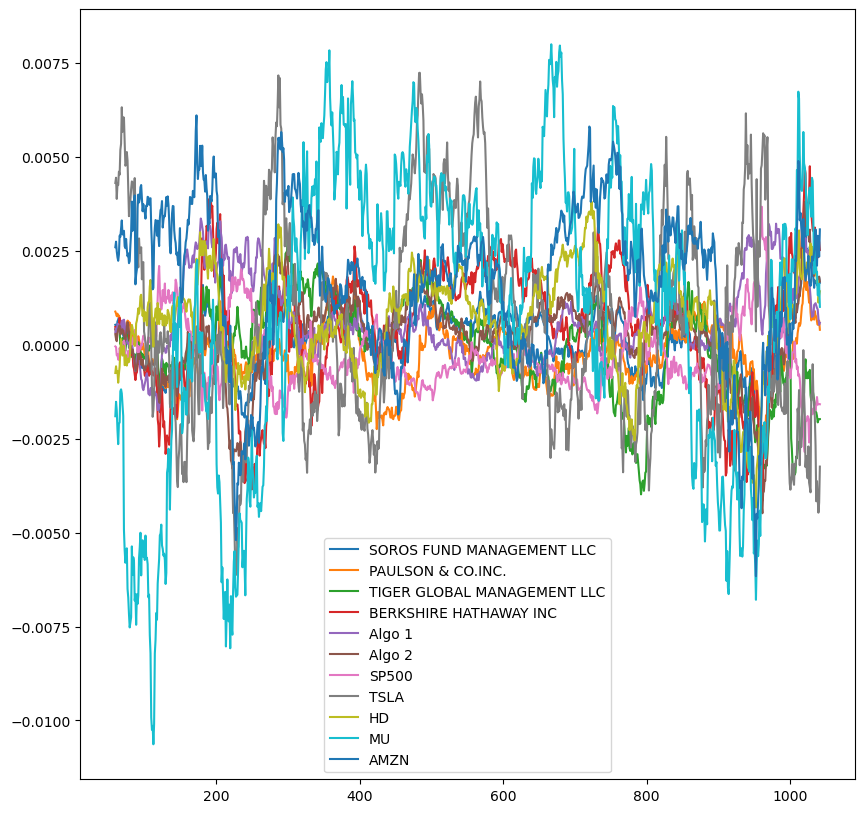

In [60]:
rolling_all_portfolio_returns.plot(kind='line', figsize=(10,10))

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [61]:
# Calculate the annualized `std`
# Will fist need to calculate std before it can be annualized
entire_portfolio_std = all_portfolio_returns.std()

entire_portfolio_std.head(12)


SOROS FUND MANAGEMENT LLC      0.007900
PAULSON & CO.INC.              0.007027
TIGER GLOBAL MANAGEMENT LLC    0.010903
BERKSHIRE HATHAWAY INC         0.012923
Algo 1                         0.007626
Algo 2                         0.008345
SP500                          0.008590
TSLA                           0.028101
HD                             0.011697
MU                             0.029506
AMZN                           0.018858
dtype: float64

In [62]:
# Annualize the standard deviation from above
entire_annualized_std = entire_portfolio_std*np.sqrt(252) 
entire_annualized_std.head(12) 


SOROS FUND MANAGEMENT LLC      0.125406
PAULSON & CO.INC.              0.111556
TIGER GLOBAL MANAGEMENT LLC    0.173072
BERKSHIRE HATHAWAY INC         0.205148
Algo 1                         0.121058
Algo 2                         0.132475
SP500                          0.136359
TSLA                           0.446093
HD                             0.185684
MU                             0.468390
AMZN                           0.299357
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: title={'center': 'Rolling 21-Day Standard Deviation'}>

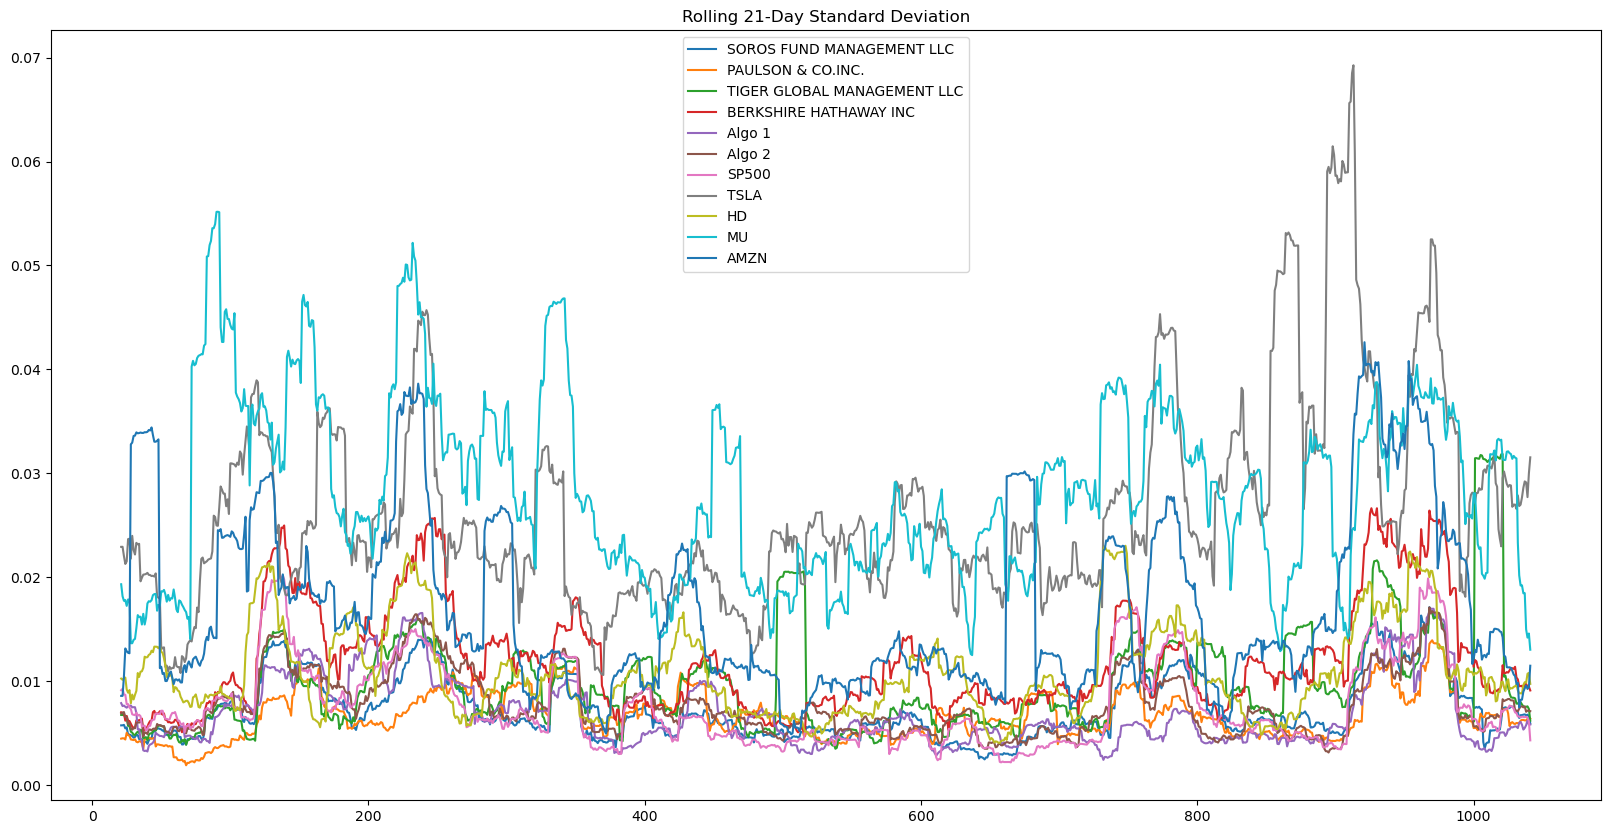

In [63]:

# Calculate the rolling standard deviation for all portfolios using a 21-day window
entire_rolling_std = all_portfolio_returns.rolling(window=21).std()

# Plot the rolling standard deviation
entire_rolling_std.plot(title='Rolling 21-Day Standard Deviation', figsize=(20,10))


### Calculate and plot the correlation

<Axes: >

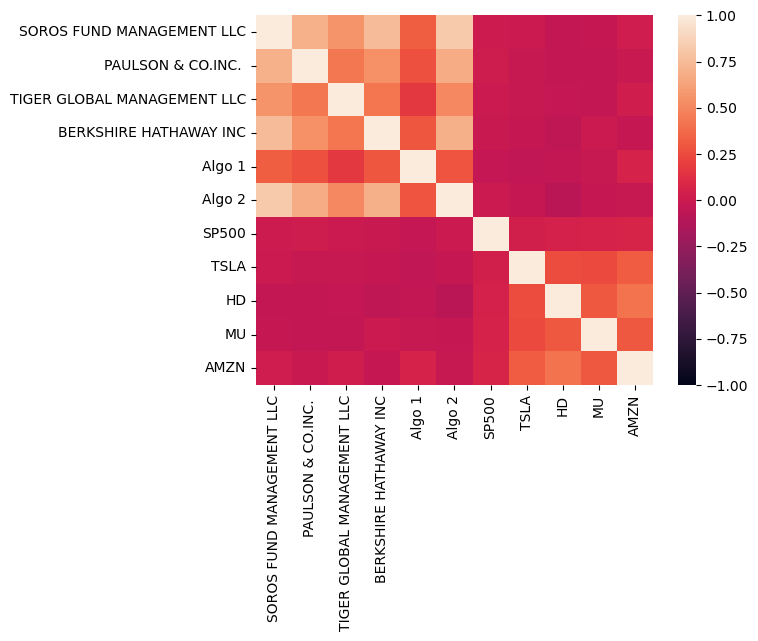

In [64]:
# Calculate the correlation for new combined dataframe with All portfolios
entire_price_correlation = all_portfolio_returns.corr()

# Display correlation matrix
sns.heatmap(entire_price_correlation, vmin=-1, vmax=1)


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [65]:
# To first calculate beta we will need to calculate the Covariance of my individual stocks vs. S&P500
tsla_covariance = all_portfolio_returns['TSLA'].cov(all_portfolio_returns['SP500'])
hd_covariance = all_portfolio_returns['HD'].cov(all_portfolio_returns['SP500'])
mu_covariance = all_portfolio_returns['MU'].cov(all_portfolio_returns['SP500'])
amzn_covariance = all_portfolio_returns['AMZN'].cov(all_portfolio_returns['SP500'])

print(f"TSLA: {tsla_covariance} | HD: {hd_covariance} | MU: {mu_covariance} | AMZN: {amzn_covariance}")

TSLA: 9.045054279841224e-06 | HD: 5.15680047025063e-06 | MU: 1.5485004592849072e-05 | AMZN: 1.128361070075359e-05


In [66]:
# Calculate the variance of personal stocks against S&P 500
entire_variance = all_portfolio_returns['SP500'].var()
entire_variance

7.378441863997496e-05

In [67]:
# Calculate beta values of all daily returns of personal picked stocks
tsla_beta = tsla_covariance / entire_variance
hd_beta = hd_covariance / entire_variance
mu_beta = mu_covariance / entire_variance
amzn_beta = amzn_covariance / entire_variance

print(f"TSLA: {tsla_beta} | HD: {hd_beta} | MU: {mu_beta} | AMZN: {amzn_beta}")

TSLA: 0.12258759297102856 | HD: 0.06989010099019437 | MU: 0.20986821985285112 | AMZN: 0.1529267412922374


In [68]:
# Calculate the Rolling 60-Day betas of personal picked individual stocks vs. SP500

rolling_tsla_covariance = all_portfolio_returns['TSLA'].rolling(window=60).cov(all_portfolio_returns['SP500'])
rolling_hd_covariance = all_portfolio_returns['HD'].rolling(window=60).cov(all_portfolio_returns['SP500'])
rolling_mu_covariance = all_portfolio_returns['MU'].rolling(window=60).cov(all_portfolio_returns['SP500'])
rolling_amzn_covariance = all_portfolio_returns['AMZN'].rolling(window=60).cov(all_portfolio_returns['SP500'])

# Calculate 30-day rolling variance of S&P 500
rolling_entire_variance = all_portfolio_returns['SP500'].rolling(window=60).var()

# Calculate 30-day rolling beta of AMZN and plot the data
rolling_tsla_beta = rolling_tsla_covariance / rolling_entire_variance
rolling_hd_beta = rolling_hd_covariance / rolling_entire_variance
rolling_mu_beta = rolling_mu_covariance / rolling_entire_variance
rolling_amzn_beta = rolling_amzn_covariance / rolling_entire_variance


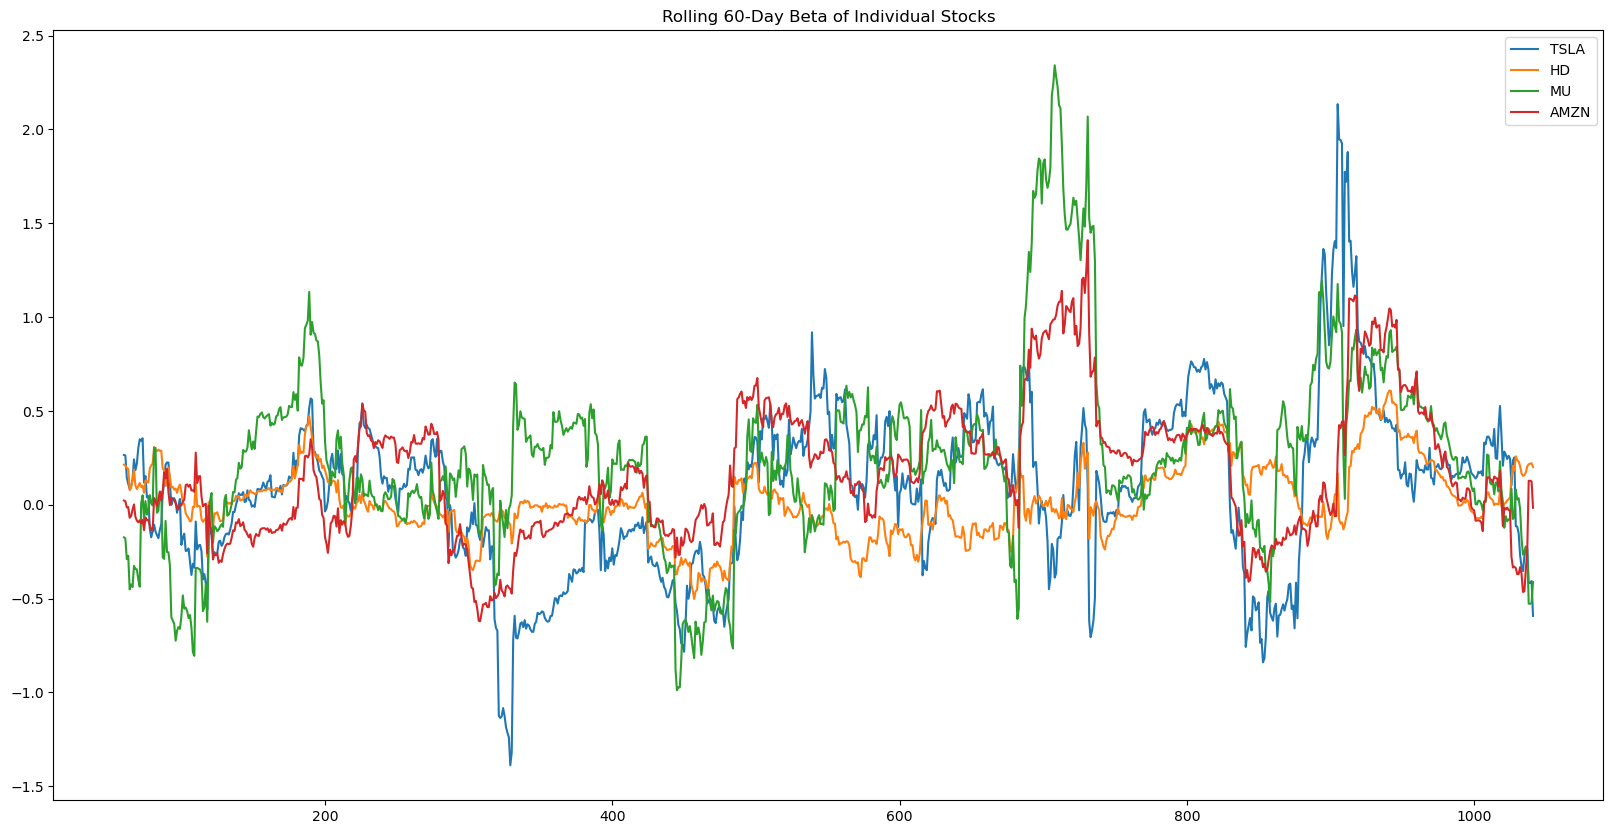

In [69]:
# Set the figure and plot the different datasets as multiple trends on the same figure
ax = rolling_tsla_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Individual Stocks')
rolling_hd_beta.plot(ax=ax)
rolling_mu_beta.plot(ax=ax)
rolling_amzn_beta.plot(ax=ax)

# Set the legend of the figure
ax.legend(["TSLA", "HD", "MU", "AMZN"])

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [70]:
# Calculate Annualized sharpe ratios
annualized_sharpe_ratios = (all_portfolio_returns.mean() * 252) / (entire_annualized_std)

annualized_sharpe_ratios.head(12)


SOROS FUND MANAGEMENT LLC      0.345506
PAULSON & CO.INC.             -0.480959
TIGER GLOBAL MANAGEMENT LLC   -0.129556
BERKSHIRE HATHAWAY INC         0.614872
Algo 1                         1.374206
Algo 2                         0.486307
SP500                         -0.526730
TSLA                           0.365729
HD                             0.801282
MU                             0.450975
AMZN                           1.490891
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

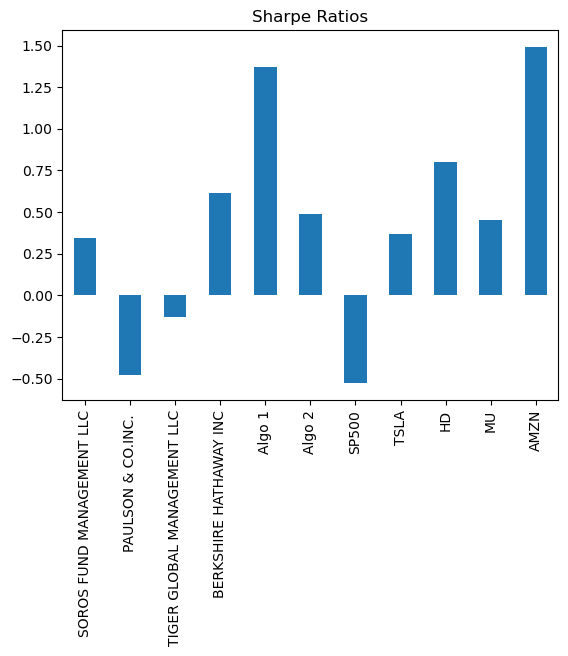

In [71]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [72]:
# Overall my portfolio performed better than most other alternatives offered. While Amazon leading the way for my portfolio. It had the higest sharpe ratio out of all other options. The correlation between the individul stocks wasn't the greatest but the risk to reward ratio made up for the lack of diversification. 